Given the star ratings that I just scraped, I can now agreggate the ratings for specific categories. 
- histogram of star ratings
- maybe a dropdown of sorts idk

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
reviews_df = pd.read_csv("data/BA_reviews.csv")

# data and structure overview
# reviews_df.head()
# reviews_df.shape

# drop empty reviews
reviews_df = reviews_df.dropna(subset = ['reviews'])

# reviews_df.iloc[0,1]

#Let's only include verified reviews
verified_df = reviews_df[reviews_df.iloc[:,1].str.contains("Trip Verified")]
# verified_df.shape

#remove the verified
verified_df.loc[:,'reviews'] = verified_df.loc[:,'reviews'].apply(lambda x: x[18:])

In [23]:
# verified_df['Value For Money'].dtype
verified_df

,Unnamed: 0,reviews,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,Aircraft
1,1,My son and I flew to Geneva last Sunday for a...,Family Leisure,Business Class,Gatwick to Geneva,December 2023,2.0,1.0,1.0,1.0,1,no,1.0,1.0,NaN
2,2,For the price paid (bought during a sale) it ...,Solo Leisure,Business Class,Istanbul to London Heathrow,December 2023,1.0,4.0,5.0,2.0,4,yes,1.0,NaN,A320
3,3,Flight left on time and arrived over half an ...,Solo Leisure,Economy Class,London Heathrow to Istanbul,December 2023,3.0,2.0,1.0,5.0,2,no,1.0,NaN,A320
4,4,"Very Poor Business class product, BA is not e...",Business,Business Class,Gatwick to St Lucia,December 2023,1.0,5.0,2.0,1.0,2,no,2.0,2.0,Boeing 777
6,6,Absolutely pathetic business class product. BA...,Business,Business Class,Lisbon to Houston via London Heathrow,November 2023,1.0,2.0,4.0,3.0,1,no,1.0,1.0,Boeing 777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,1408,"After 3 hour delay at airport, flight destined...",Solo Leisure,Economy Class,London Gatwick to Verona,October 2017,4.0,2.0,NaN,1.0,1,no,NaN,NaN,NaN
1409,1409,Flew British Airways from Madrid to London Hea...,Business,Economy Class,Madrid to London Heathrow,September 2017,3.0,4.0,NaN,3.0,1,no,NaN,NaN,NaN
1410,1410,Tel Aviv to London. We arrived at the airport...,Solo Leisure,First Class,Tel Aviv to London,November 2017,5.0,4.0,5.0,2.0,5,yes,4.0,1.0,Boeing 777-200
1411,1411,London to Tel Aviv. Arrived at Heathrow at ab...,Solo Leisure,Business Class,London to Tel Aviv,November 2017,5.0,4.0,4.0,4.0,5,yes,1.0,1.0,Boeing 777-200


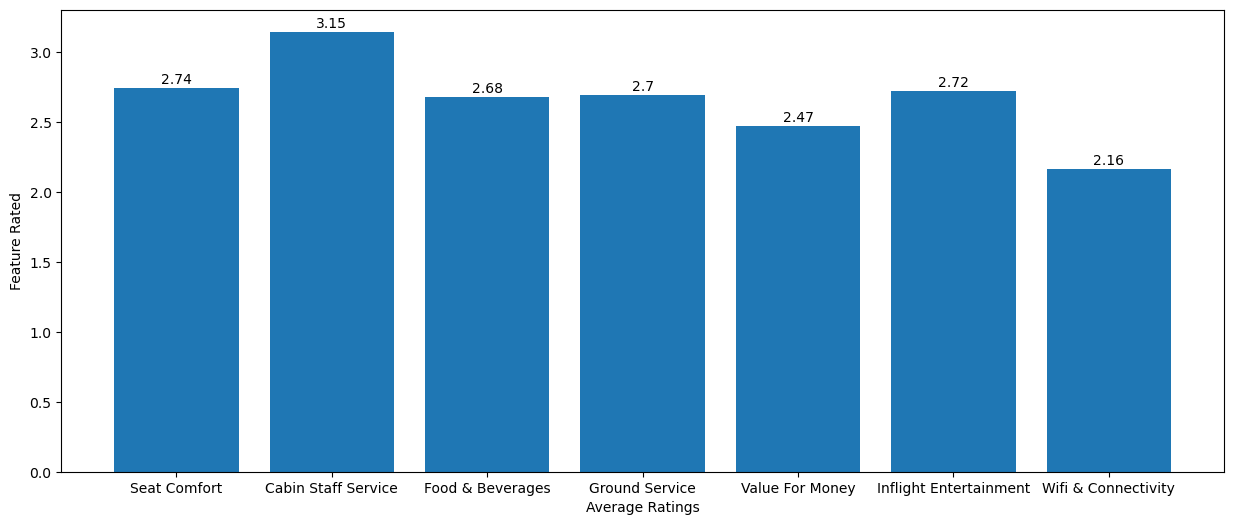

In [34]:
#Average star ratings in each category
star_averages = [verified_df[col].mean() for col in list(verified_df.columns[6:11]) +
                 list(verified_df.columns[12:14])]
# print(star_averages)

plt.figure(figsize = (15,6))
star_categories = list(verified_df.columns[6:11]) + list(verified_df.columns[12:14])
plt.bar(star_categories, star_averages)
plt.xlabel('Average Ratings')
plt.ylabel('Feature Rated')
for index, score in enumerate(star_averages):
    plt.text(index, score + .01, round(score,2), ha = 'center', va = 'bottom')

plt.show()

In [37]:
# Would most reviewers recommend the airline? No.
num_yes = list(verified_df['Recommended']).count('yes')
num_no = list(verified_df['Recommended']).count('no')
print("Yes:", num_yes, " No:", num_no)

Yes: 406  No: 769


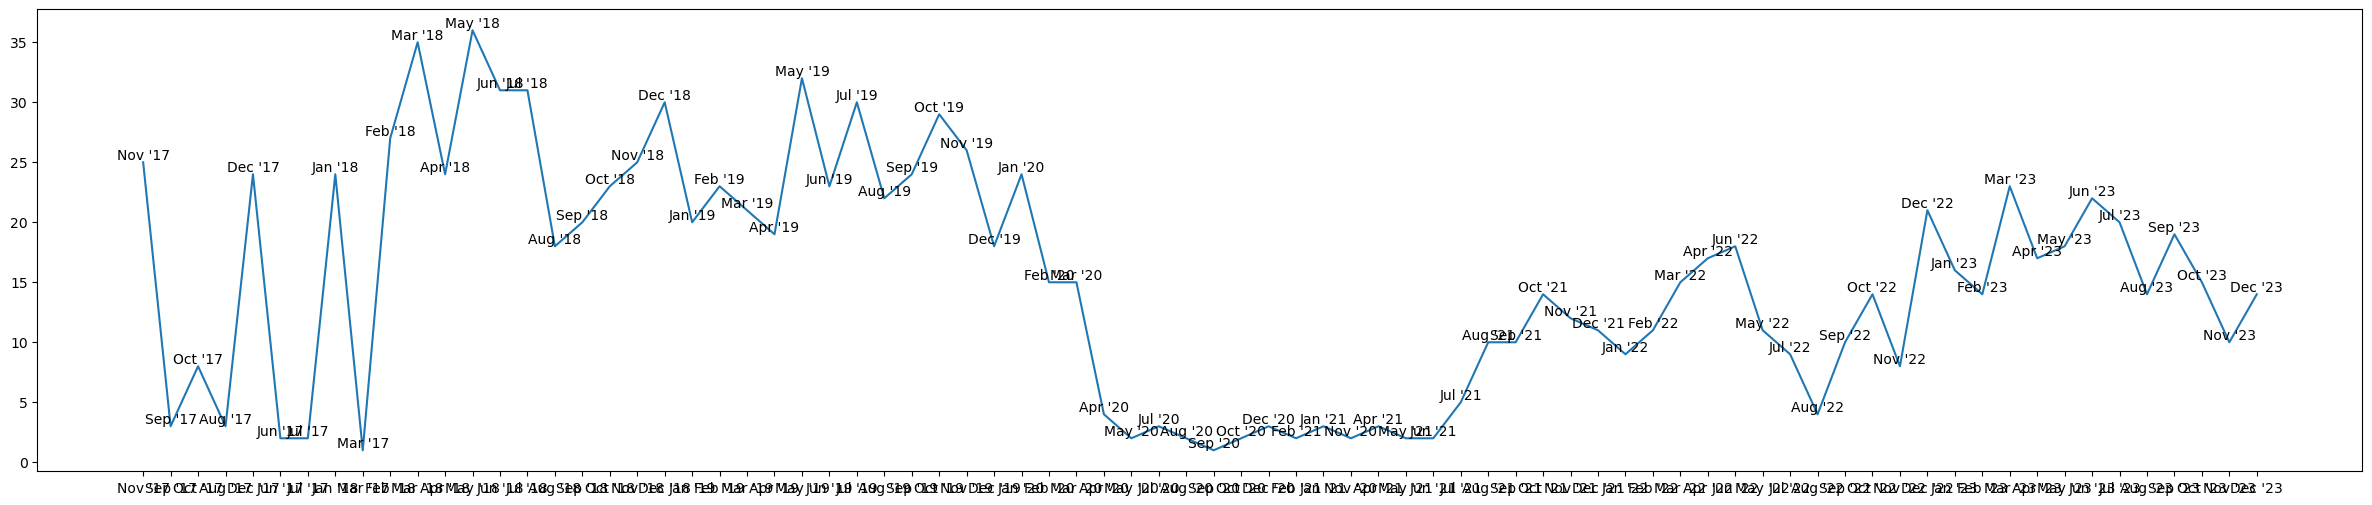

In [49]:
#Plotting number of reviews, which is generally correlated with a small percentage of total passengers
#generally not much of a pattern, maybe some spikes in late spring to summer
#obvious stagnation during pandemic period
month_year = list(verified_df['Date Flown'])[::-1]

time_points = {}

for date_str in month_year:
    date_str = date_str[:3] + f" '" + date_str[-2:]
    if date_str not in time_points:
        time_points[date_str] = 1
    else: 
        time_points[date_str] += 1
# print(time_points)

plt.figure(figsize = (30,6))
x = list(time_points.keys())
y = list(time_points.values())
plt.plot(x,y)
for i, num_reviews in enumerate(y):
    plt.text(x[i], num_reviews, f'{x[i]}', ha = 'center', va = 'bottom')
plt.show()

In [ ]:
#Trying Wordcloud as suggested by the prompt

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [ ]:
# Trend graph of number of reviews by Month/Year
